In [1]:
import pandas as pd, numpy as np

In [2]:
df = pd.read_csv('../DataIncubator/faredata2013/trip_fare_1.csv')

In [3]:
df.columns = [u'medallion', u'hack_license', u'vendor_id', u'pickup_datetime',
       u'payment_type', u'fare_amount', u'surcharge', u'mta_tax',
       u'tip_amount', u'tolls_amount', u'total_amount']

In [4]:
data = df.sample(3000000)

In [5]:
data.to_csv('../DataIncubator/faredata2013/sample_tf_1.csv')

In [6]:
dt = pd.read_csv('../DataIncubator/faredata2013/sample_tf_1.csv', index_col= u'pickup_datetime', parse_dates=True)

In [7]:
dt.head()

,Unnamed: 0,medallion,hack_license,vendor_id,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
pickup_datetime,,,,,,,,,,,
2013-01-09 10:28:00,12525310,7C7F7C78F1ECB5625E1F611E711DB449,BA8459F5E3A2983535489082ED3E4576,VTS,CRD,6.0,0,0.5,1.00,0,7.50
2013-01-25 19:53:00,8660488,F6BB15B0F863D58E24EAC1D99AA7230D,DE71A0CE2C79C14DE76DD394D3CBBBF3,VTS,CRD,5.0,1,0.5,1.00,0,7.50
2013-01-02 19:52:49,6215379,9586875D69266356216B11BB2B1C77EE,FE2CE79AC4F58E9F92575B1CF4A1210D,CMT,CSH,6.5,1,0.5,0.00,0,8.00
2013-01-28 10:40:55,10805133,A736ACD72F31A3190F4A80D93B170F5E,D1B753B85DCDD9D2593BEFF413B97CB2,CMT,CRD,15.0,0,0.5,3.85,0,19.35
2013-01-11 19:49:00,13093800,6FA6706AA2E5DBC48E13D0F2CD748A3A,31A463A85C833101D2691C0A71C1E751,VTS,CRD,8.5,1,0.5,1.90,0,11.90


In [8]:
dt.loc[:, 'date'] = dt.index.date
dt.loc[:, 'day'] = dt.index.day
dt.loc[:, 'hour'] = dt.index.hour

In [9]:
dt.head()

,Unnamed: 0,medallion,hack_license,vendor_id,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,date,day,hour
pickup_datetime,,,,,,,,,,,,,,
2013-01-09 10:28:00,12525310,7C7F7C78F1ECB5625E1F611E711DB449,BA8459F5E3A2983535489082ED3E4576,VTS,CRD,6.0,0,0.5,1.00,0,7.50,2013-01-09,9,10
2013-01-25 19:53:00,8660488,F6BB15B0F863D58E24EAC1D99AA7230D,DE71A0CE2C79C14DE76DD394D3CBBBF3,VTS,CRD,5.0,1,0.5,1.00,0,7.50,2013-01-25,25,19
2013-01-02 19:52:49,6215379,9586875D69266356216B11BB2B1C77EE,FE2CE79AC4F58E9F92575B1CF4A1210D,CMT,CSH,6.5,1,0.5,0.00,0,8.00,2013-01-02,2,19
2013-01-28 10:40:55,10805133,A736ACD72F31A3190F4A80D93B170F5E,D1B753B85DCDD9D2593BEFF413B97CB2,CMT,CRD,15.0,0,0.5,3.85,0,19.35,2013-01-28,28,10
2013-01-11 19:49:00,13093800,6FA6706AA2E5DBC48E13D0F2CD748A3A,31A463A85C833101D2691C0A71C1E751,VTS,CRD,8.5,1,0.5,1.90,0,11.90,2013-01-11,11,19


In [11]:
# get the count of records by date
countdata = dt.groupby(dt.index.date).size()
countdata.head()

2013-01-01    83639
2013-01-02    79613
2013-01-03    89694
2013-01-04    96893
2013-01-05    96318
dtype: int64

In [18]:
print len(countdata)
print countdata[0]
print countdata.sum()

31
83639
3000000


In [24]:
prop_rides = [countdata[i]*1.0/countdata.sum() for i in range(31)]
prop_series = pd.Series(prop_rides)
prop_series.index = countdata.index

In [26]:
prop_series.head()

2013-01-01    0.027880
2013-01-02    0.026538
2013-01-03    0.029898
2013-01-04    0.032298
2013-01-05    0.032106
dtype: float64

In [12]:
# magic command to display matplotlib plots inline within the ipython notebook webpage
%matplotlib inline

# import necessary modules
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import matplotlib.cm as cm, matplotlib.font_manager as fm

In [13]:
# define the font styles
title_font = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=15, weight='normal', stretch='normal')
label_font = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=12, weight='normal', stretch='normal')
ticks_font = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=10, weight='normal', stretch='normal')
annotation_font = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=10, weight='normal', stretch='normal')
axis_bgcolor = '#f0f0f0'

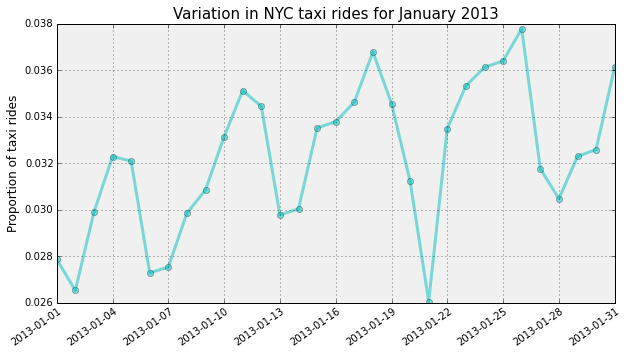

In [53]:
fig, ax = plt.subplots() 
ax = prop_series.plot(kind='line',
                    figsize=[10, 5],
                    linewidth='3', 
                    alpha=0.5,
                    marker='o',
                    color='c')

# set the x-ticks/labels for every nth row of the data: 1 tick mark per horizontal inch
n = len(prop_series) / int(fig.get_size_inches()[0]) #interval between tick marks
xtick_data = prop_series.iloc[range(0, len(prop_series), n)] #rows spaced apart by that interval
ax.xaxis.set_ticks(xtick_data.index) #set the tick labels as the dates of those rows

ax.xaxis.grid(True)
ax.yaxis.grid(True)

# set tick labels, axis labels, and title
ax.set_xticklabels(xtick_data.index, rotation=35, rotation_mode='anchor', ha='right', fontproperties=ticks_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)
ax.set_title('Variation in NYC taxi rides for January 2013', fontproperties=title_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_ylabel('Proportion of taxi rides', fontproperties=label_font)
ax.set_axis_bgcolor(axis_bgcolor)

plt.savefig('../DataIncubator/pic1.png', dpi=None, facecolor='w', edgecolor='w',
        orientation='landscape', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0,
        frameon=None)
plt.show()

In [28]:
ds = dt.groupby(by=['day', 'hour'], axis=0, as_index=False, group_keys=False).mean()

In [29]:
ds.head()

,day,hour,Unnamed: 0,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,1,0,3657258,12.231234,0.496281,0.498309,1.019821,0.072230,14.317875
1,1,1,3713890,13.004362,0.495523,0.497607,1.139821,0.082924,15.220236
2,1,2,3098467,13.033682,0.495481,0.497238,1.160991,0.077431,15.264823
3,1,3,3184595,13.621206,0.492157,0.495294,1.197851,0.122343,15.928851
4,1,4,3229450,13.750611,0.489177,0.494589,1.125200,0.161485,16.021063


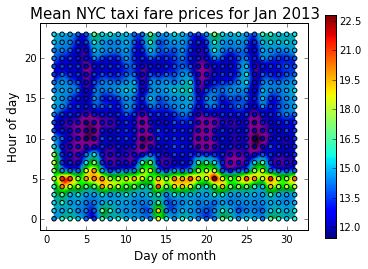

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate

# data:
x, y, z = ds['day'], ds['hour'], ds['total_amount']

# Set up a regular grid of interpolation points
xi, yi = np.linspace(x.min(), x.max(), 100), np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)
fig = plt.figure()
ax = fig.add_subplot(111)
# Interpolate
rbf = scipy.interpolate.Rbf(x, y, z, function='linear')
zi = rbf(xi, yi)

plt.imshow(zi, vmin=z.min(), vmax=z.max(), origin='lower',
           extent=[x.min(), x.max(), y.min(), y.max()], cmap = 'spectral')
plt.scatter(x, y, c=z)
plt.colorbar()
plt.xlabel('Day of month', fontproperties=label_font)
plt.ylabel('Hour of day', fontproperties=label_font)
ax.set_title('Mean NYC taxi fare prices for Jan 2013', fontproperties=title_font)
ax.figsize = [12,9]
plt.savefig('../DataIncubator/pic2.png', dpi=None, facecolor='w', edgecolor='w',
        orientation='landscape', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0,
        frameon=None)
plt.show()